Import the necessary packages

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load the dataset

In [2]:
raw_data = pd.read_csv("Dataset/iris.csv")

In [3]:
raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploring the flower features uisng visualizations

In [4]:
#brief statistical overview of the data
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#check for missing values
raw_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 1.0, 'Count Plot of the Flower Species')

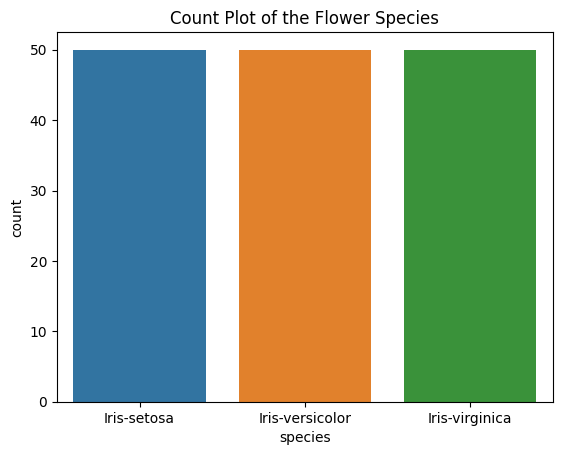

In [7]:
#getting a count plot of the species
sns.countplot(raw_data, x = 'species', hue = 'species')
plt.title("Count Plot of the Flower Species")

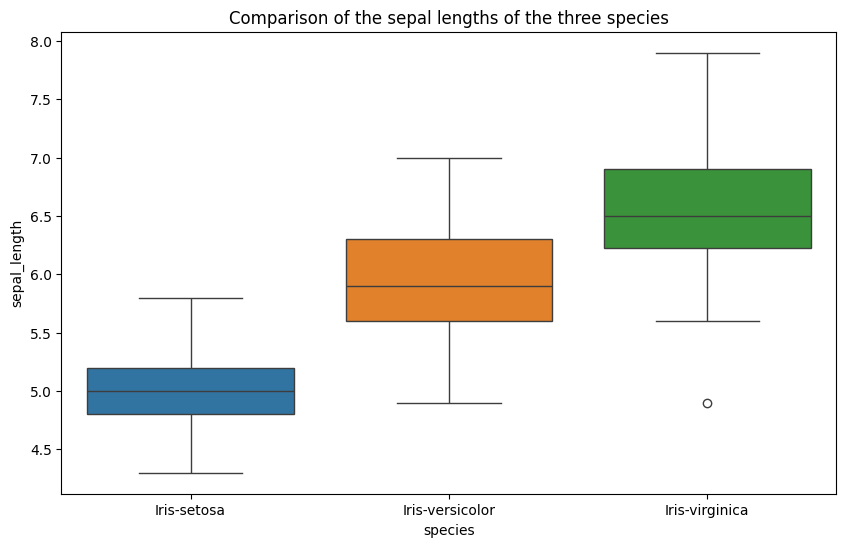

In [8]:
#comparing the sepal lengths of the three species
#filtered_specie = raw_data[raw_data['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

plt.figure(figsize = (10,6))
sns.boxplot(raw_data, x='species', y='sepal_length', hue = 'species')
plt.title('Comparison of the sepal lengths of the three species')
plt.show()

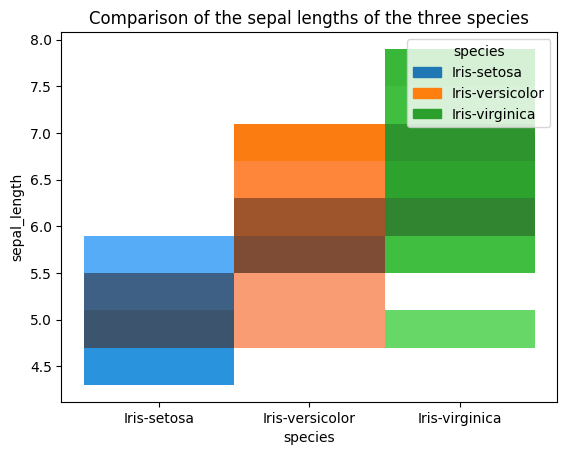

In [9]:
sns.histplot(raw_data, x = 'species', y='sepal_length', hue='species')
plt.title('Comparison of the sepal lengths of the three species')
plt.show()

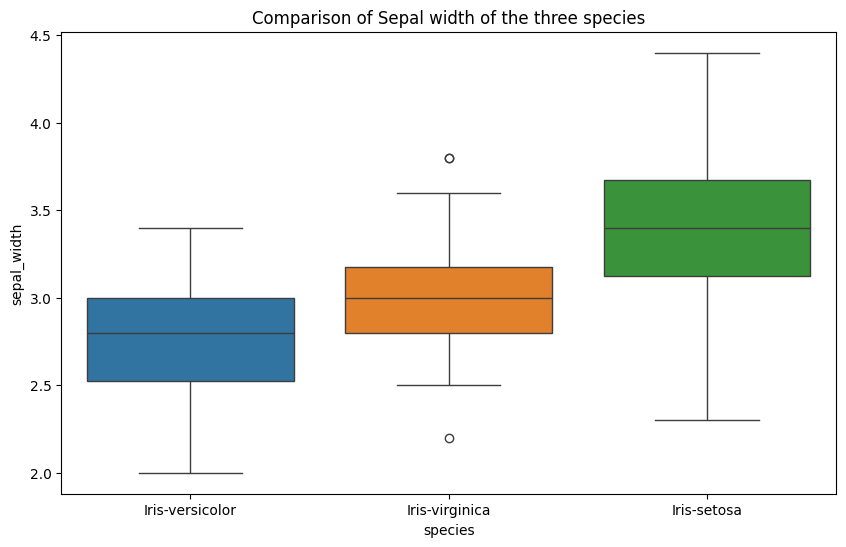

In [10]:
#comparing the sepal width of the three species
plt.figure(figsize = (10, 6))
sns.boxplot(x='species',y='sepal_width',data=raw_data.sort_values('sepal_width',ascending=True), hue = 'species')

plt.title("Comparison of Sepal width of the three species")
plt.show()

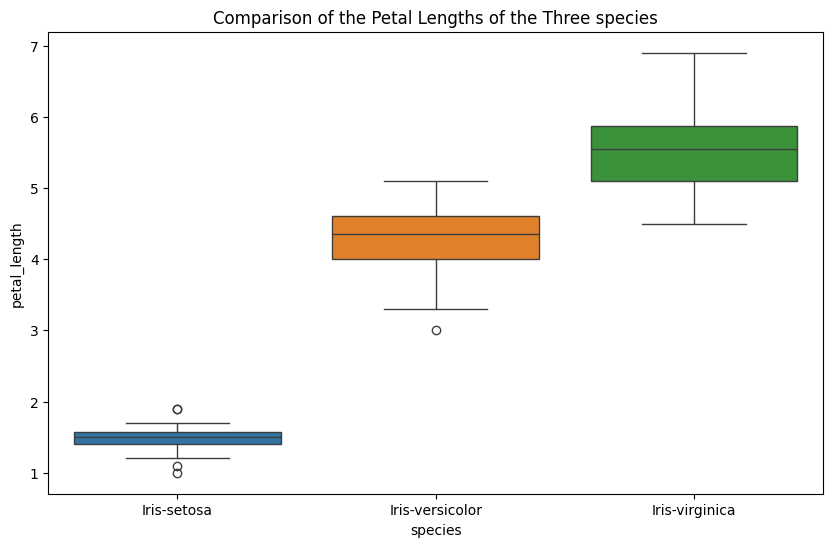

In [11]:
#comparing the petal length of the three species
plt.figure(figsize = (10, 6))
sns.boxplot(x= 'species', y = 'petal_length', data = raw_data.sort_values('petal_length', ascending=True), hue = 'species')
plt.title('Comparison of the Petal Lengths of the Three species')
plt.show()

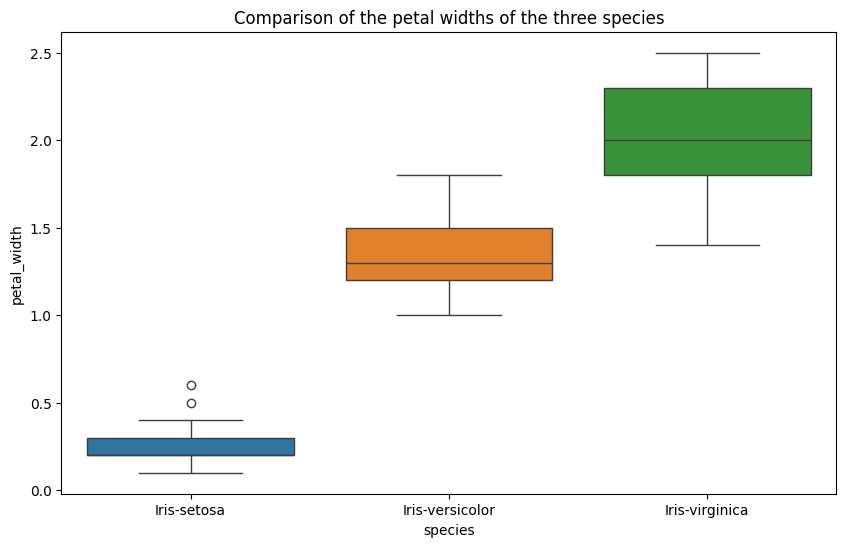

In [12]:
#comparing the petal Width of the three species
plt.figure(figsize = (10,6))
plt.title("Comparison of the petal widths of the three species")
sns.boxplot(x = 'species', y='petal_width', data = raw_data.sort_values('petal_width', ascending = True), hue = 'species')
plt.show()

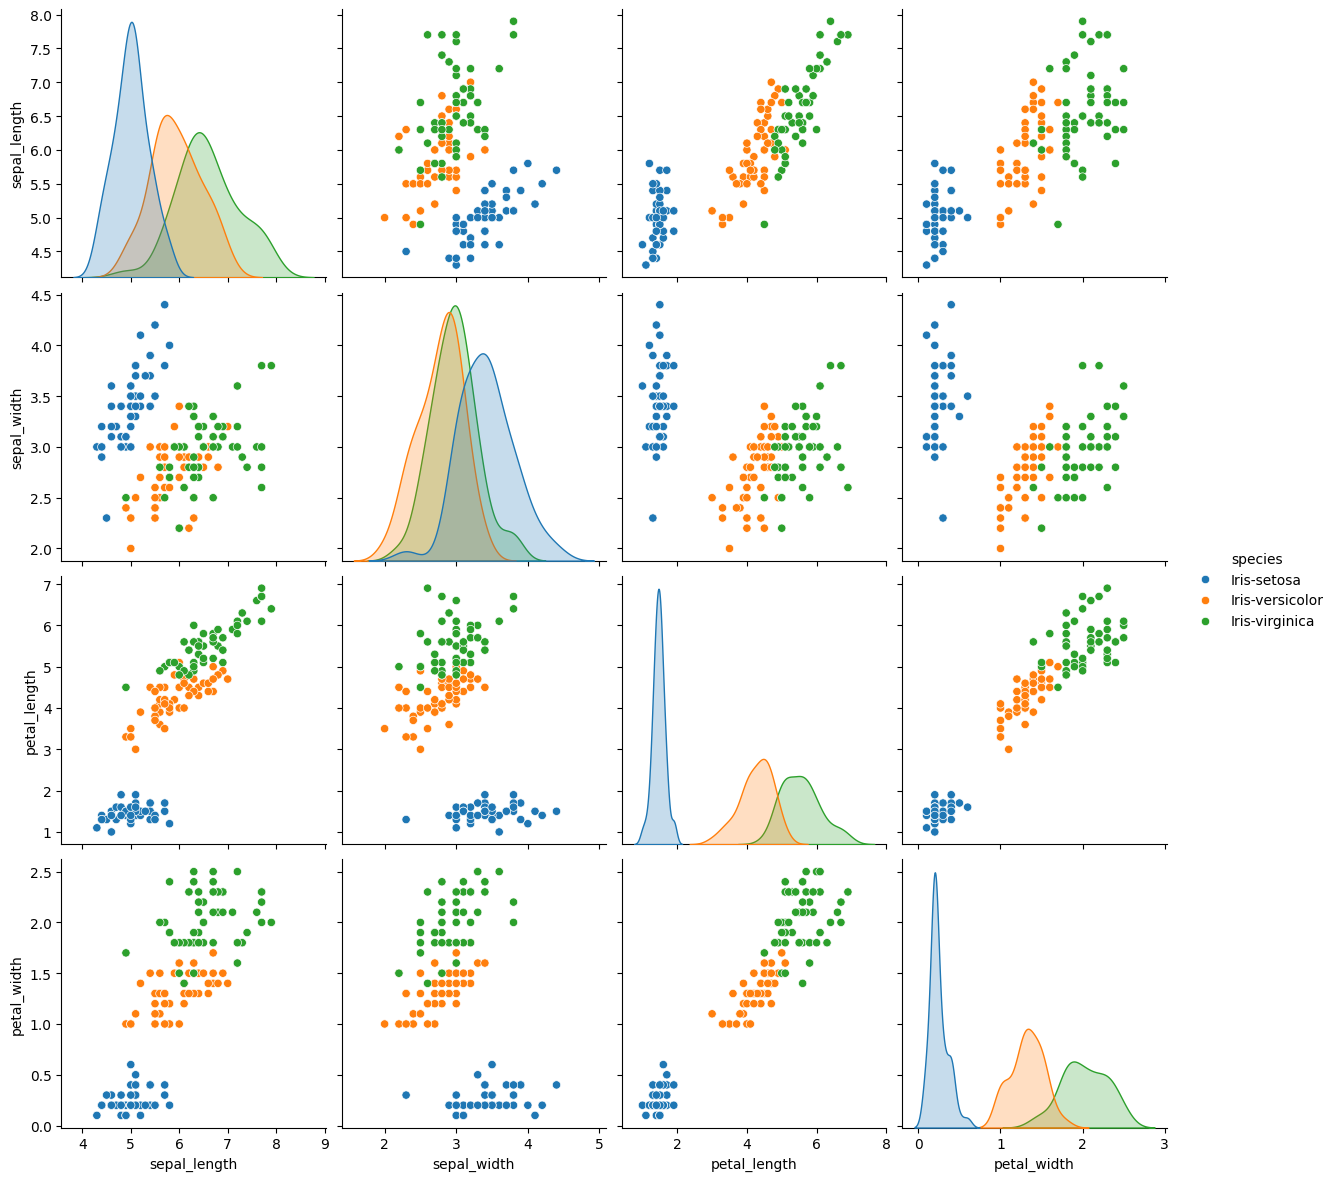

In [13]:
#creating a pairplot 
sns.pairplot(raw_data, hue = 'species', height = 3)


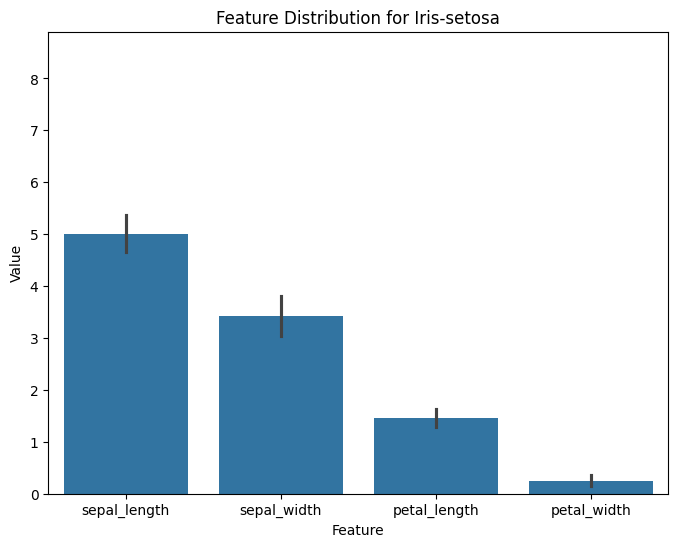

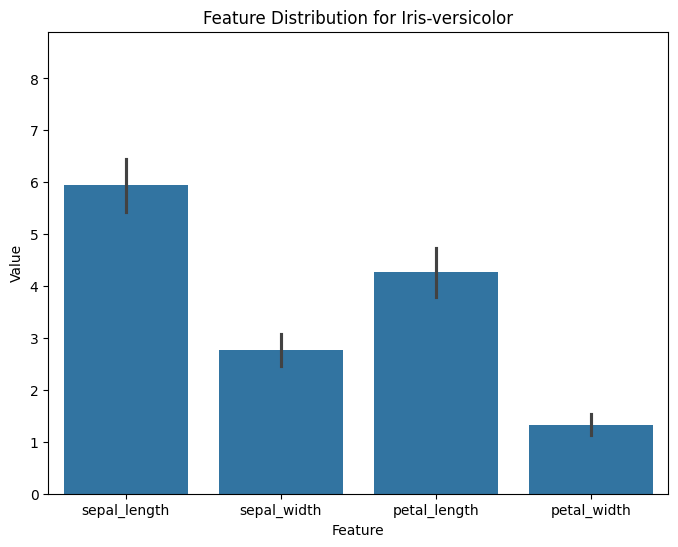

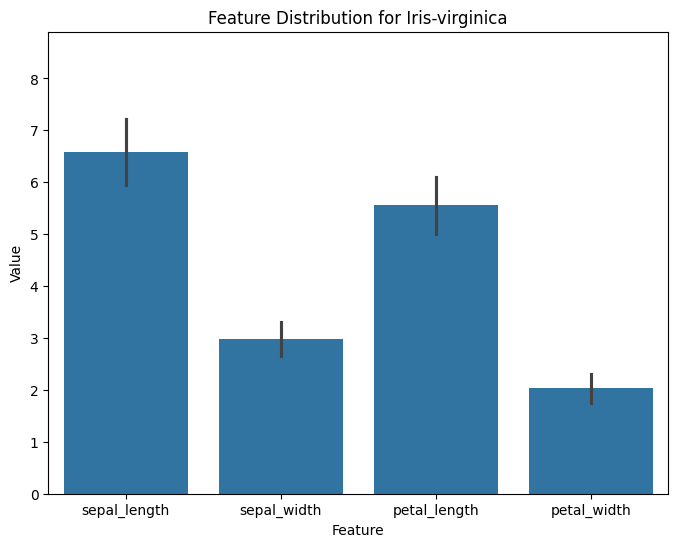

In [14]:
#Feature Distribution for each specie

specie_list = raw_data['species'].unique()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for specie in specie_list:
    specie_data = raw_data[raw_data['species'] == specie][features]
    melt_data = pd.melt(specie_data, var_name = 'feature', value_name='value')
     # Plot the feature distribution for the current species
    plt.figure(figsize=(8, 6))
    sns.barplot(data=melt_data, x='feature', y='value', errorbar="sd")
    plt.title(f"Feature Distribution for {specie.capitalize()}")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.ylim(0, raw_data[features].max().max() + 1)  # Ensure consistent y-axis
    plt.show()

In [15]:
# A function to calculate covariance

def cov(x, y):
    mean_x = sum(x) / float(len(x)) #to calculate the mean of x
    mean_y = sum(y) / float(len(y)) #to calculate the mean of y

    sub_x = [i - mean_x for i in x ] #subtracting the mean from each x variable 
    sub_y = [i - mean_y for i in y] #subtracting the mean from each y variable
    sum_value =  sum([sub_x[i] * sub_y[i] for i in range (len(x))]) # sum of all the product difference

    denom = float (len(x) - 1) 

    covariance_value = sum_value / denom # divide the sum by the number of samples

    return covariance_value
    
        

    

 

In [16]:
# A function to calculate covariance matrix

def covMat(arr):
    c = [[cov(a,b) for a in arr.T] for b in arr.T]
    return np.array(c)

Using the Np.Cov Method

In [17]:
#using the np function to compute the covariance
numeric_data = raw_data.drop(['species'], axis = 1)
new_data = numeric_data.values
cov_iris = np.cov(new_data, rowvar=False)
print("Covariance Matrix:\n", cov_iris)

Covariance Matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


Using the Covariance Matrix Function I Computed

In [18]:
#using the function I computed

computed_covariance = covMat(new_data)
print("Computed Covariance matrix", computed_covariance)

Computed Covariance matrix [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [19]:
#using the covariance function to calculate the correlation matrix
# Define the correlation matrix function

def corrMat(arr):
    # Get the covariance matrix
    covariance_matrix = covMat(arr)
    
    # Calculate standard deviations for each feature
    std_devs = np.std(arr, axis=0)
    
    # Calculate the correlation matrix
    correlation_matrix = np.array([
        [covariance_matrix[i, j] / (std_devs[i] * std_devs[j]) for j in range(len(std_devs))]
        for i in range(len(std_devs))
    ])
    
    return correlation_matrix

Using the np library

In [20]:
#testing using np.corr
corr_coef = np.corrcoef(new_data, rowvar=False)
print("Correlation Coefficient:\n", corr_coef)

Correlation Coefficient:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [21]:
computed_correlation = corrMat(new_data)
print("Computed Correlation matrix", computed_correlation)

Computed Correlation matrix [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


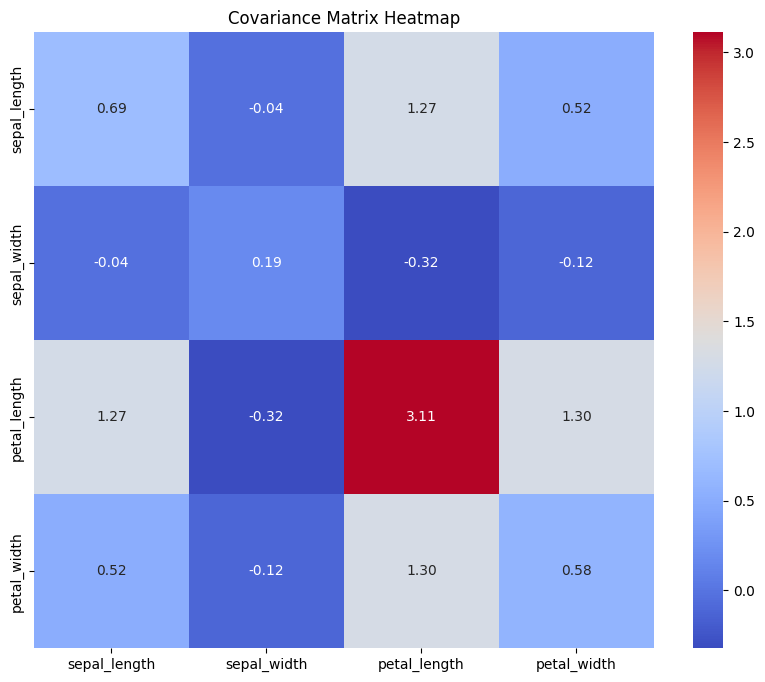

In [22]:
#plotting the visualization of the results

# Plot the covariance matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_iris , annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=raw_data.columns[:-1], yticklabels=raw_data.columns[:-1])
plt.title("Covariance Matrix Heatmap")
plt.show()



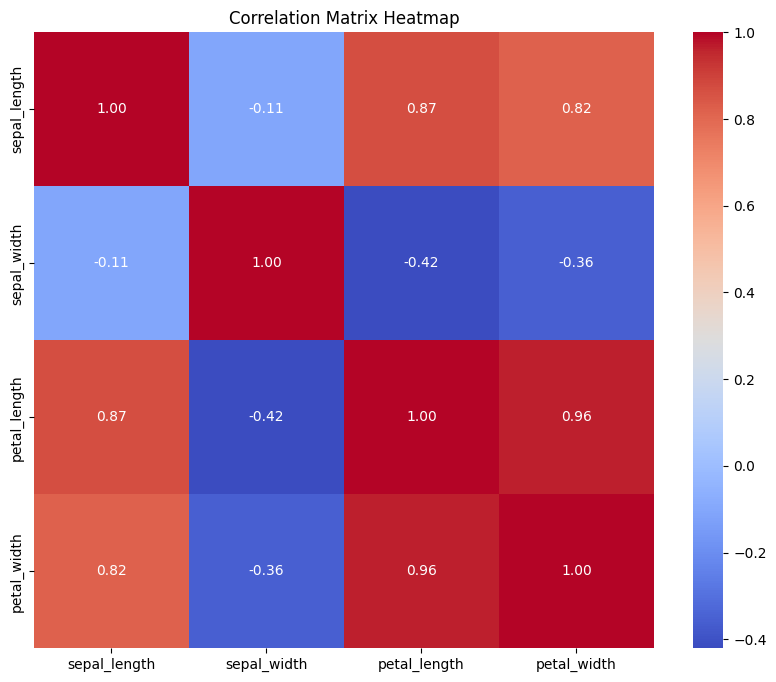

In [23]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_coef, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=raw_data.columns[:-1], yticklabels=raw_data.columns[:-1])
plt.title("Correlation Matrix Heatmap")
plt.show()

Q2- Working on the Laptop Price Dataset

In [24]:
laptop_data = pd.read_csv('Dataset/laptop_price - dataset.csv')

In [25]:
laptop_data.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [26]:
laptop_data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [47]:
laptop_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Plot the Prices of the Laptops

In [48]:
# Interactive scatter plot
plt.figure(figsize = (30,30))
fig = px.scatter(laptop_data, x='Product', y='Price (Euro)', color='Company', hover_data=['TypeName', 'RAM (GB)'])
fig.show()

<Figure size 3000x3000 with 0 Axes>

Because of too much data, plotting all the data points will be overcrowded, hence I am plotting the prices of the top 20 most expensive and top 20 least expensive

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3342313869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')


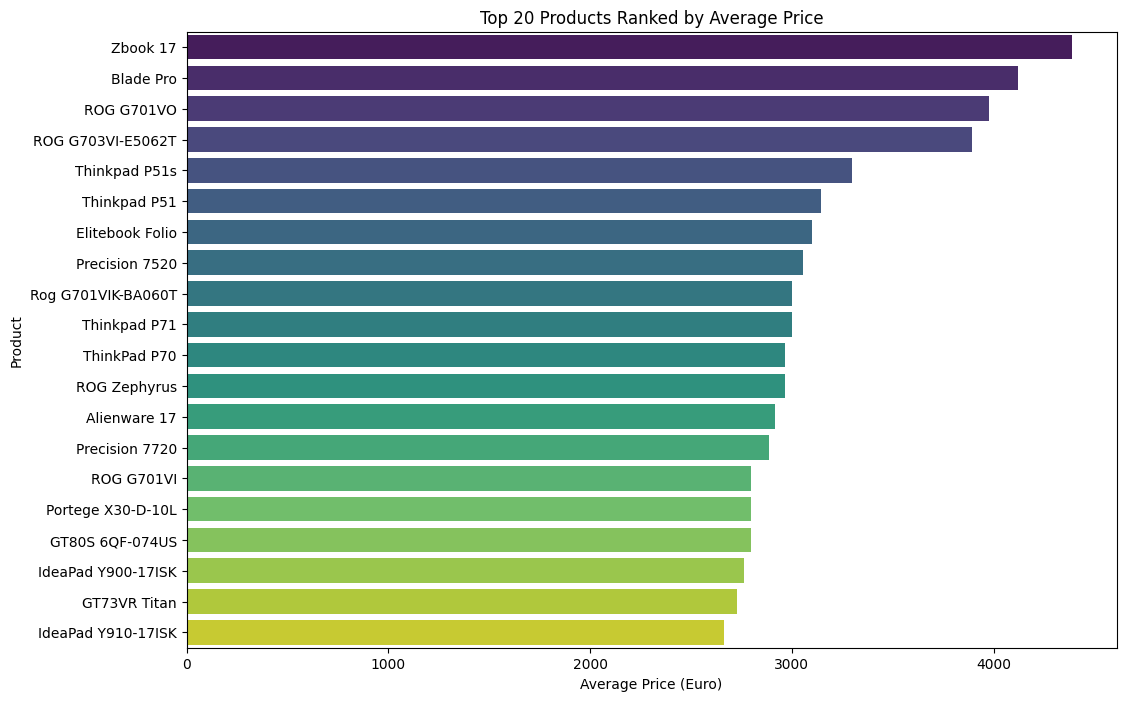

In [41]:


# Calculate the mean price for each product and rank them
ranked_products = laptop_data.groupby('Product')['Price (Euro)'].mean().sort_values(ascending=False).head(20)

# Plot the ranked distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')
plt.title('Top 20 Products Ranked by Average Price')
plt.xlabel('Average Price (Euro)')
plt.ylabel('Product')
plt.show()


/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3196685556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')


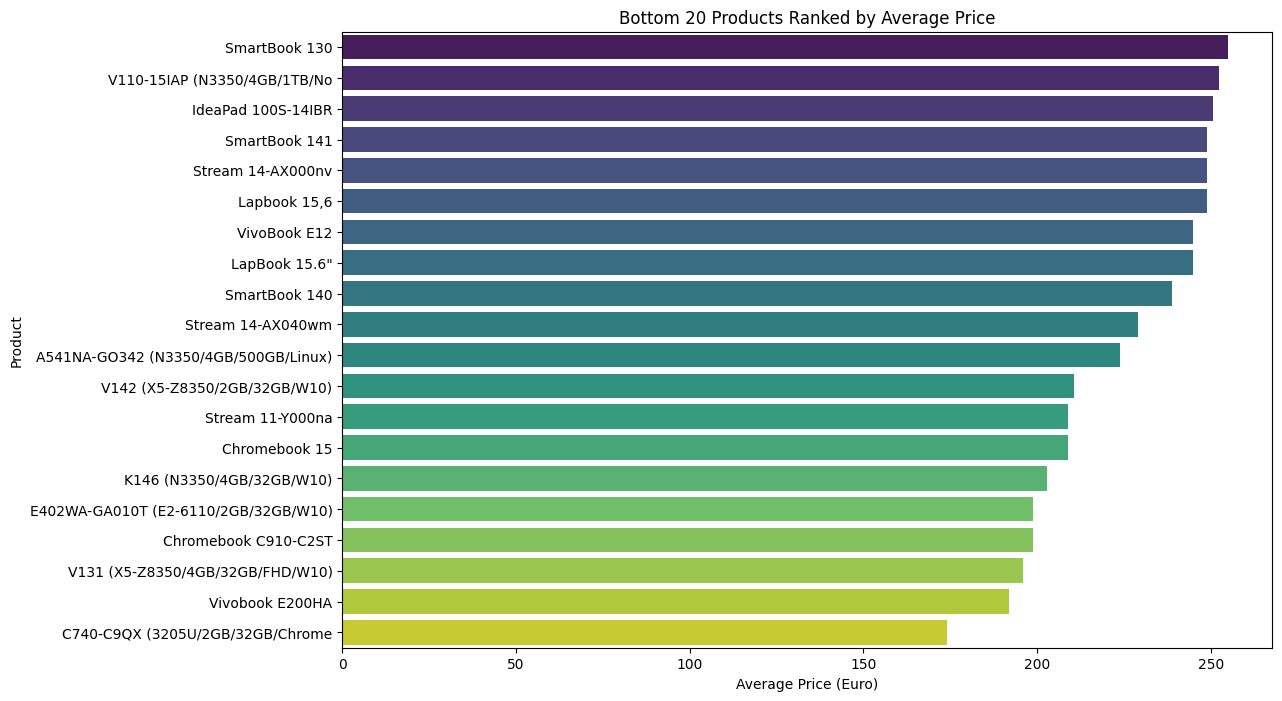

In [42]:
# Calculate the mean price for each product and rank them
ranked_products = laptop_data.groupby('Product')['Price (Euro)'].mean().sort_values(ascending=False).tail(20)

# Plot the ranked distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')
plt.title('Bottom 20 Products Ranked by Average Price')
plt.xlabel('Average Price (Euro)')
plt.ylabel('Product')
plt.show()

We are getting the company with the most expensive laptopns and avearge prices of each company

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/1591875745.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




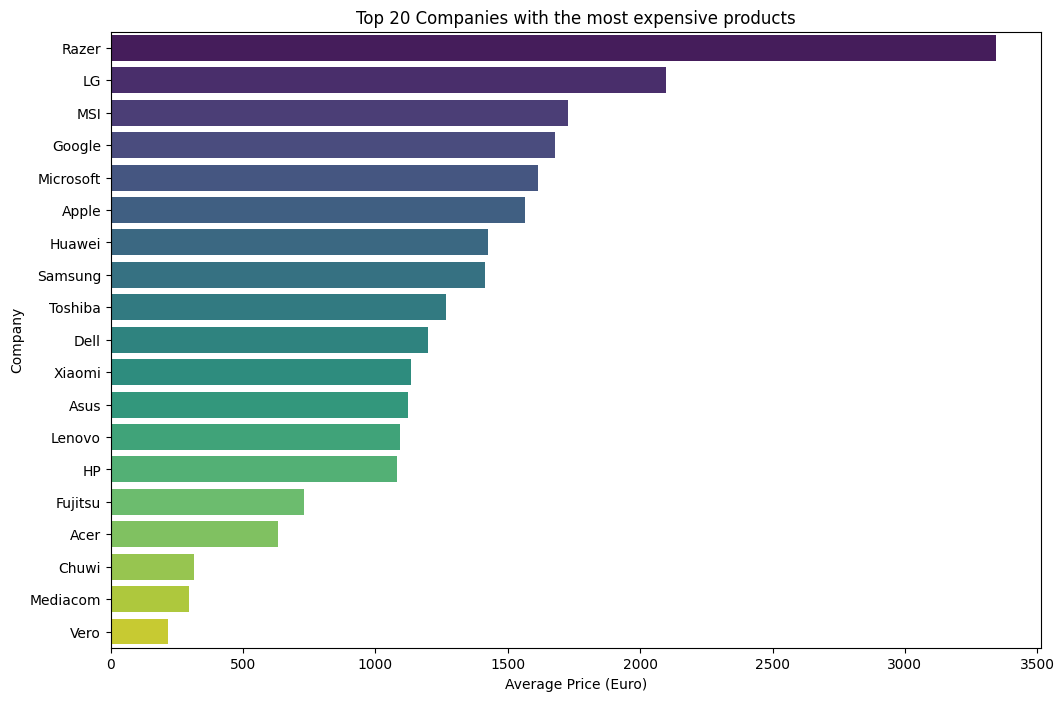

The company with the most expensive laptops on average is Razer with an average price of 3346.14 Euro.

Average laptop price for each company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


In [50]:
# Calculate the mean price per company
ranked_products = laptop_data.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False).head(20)

# Plot the ranked distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_products.values, y=ranked_products.index, palette='viridis')
plt.title('Top 20 Companies with the most expensive products')
plt.xlabel('Average Price (Euro)')
plt.ylabel('Company')
plt.show()

# Company with the most expensive laptops
most_expensive_company = ranked_products.index[0]
most_expensive_price = ranked_products.iloc[0]
print(f"The company with the most expensive laptops on average is {most_expensive_company} with an average price of {most_expensive_price:.2f} Euro.\n")

# Average laptop price for each company
print("Average laptop price for each company:")
print(ranked_products)

Find the different types of Operating systems present in the data - under the column
name "OpSys"

In [ ]:
laptop_data['OpSys'].unique() #get the unique values of the operating system column

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [58]:
#replace the OS systems that beong to the same system

mapping_OS = {'Mac OS X': 'macOS',
              'macOS': 'macOS',
              'No OS': 'No OS',
              'Windows 10': 'Windows',
              'Windows 10 S': 'Windows',
              'Windows 7': 'Windows',
              'Chrome OS': 'Linux',
              'Linux': 'Linux',
              'Android': 'Android'}
laptop_data['OpSys'].replace(mapping_OS, inplace=True)

In [59]:
laptop_data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows', 'Linux', 'Android'], dtype=object)

Plot for each Operating system types, the price distribution


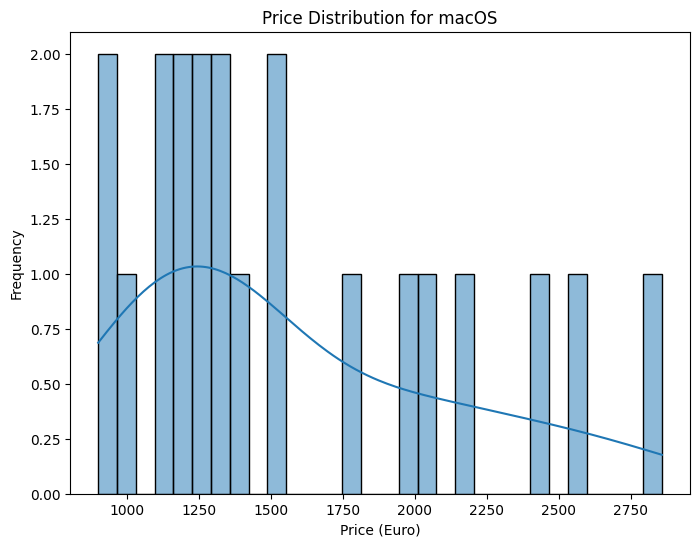

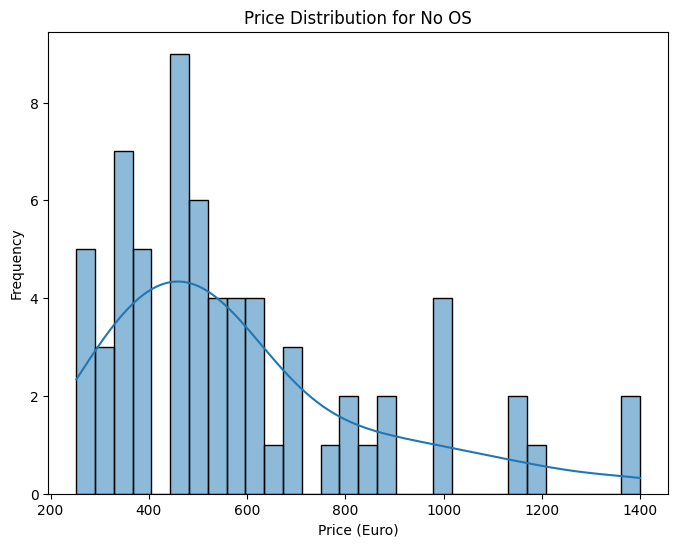

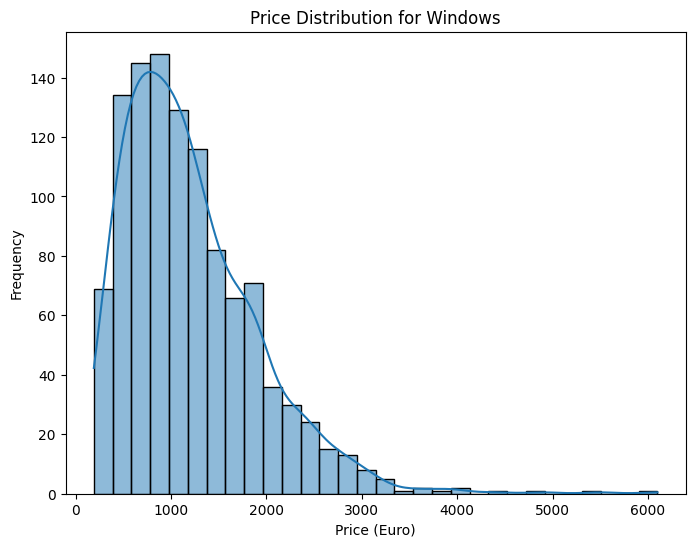

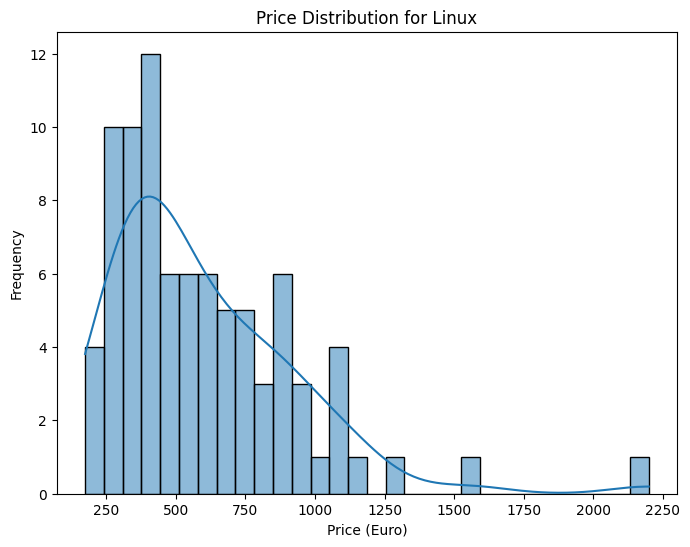

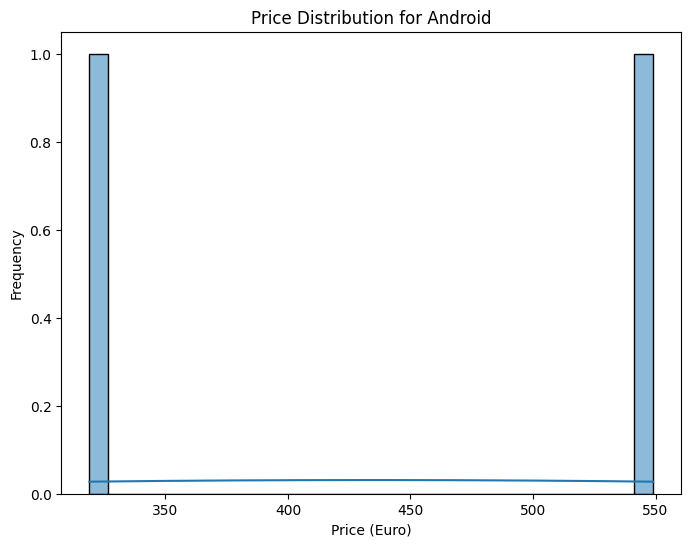

In [68]:
for operatingsys in laptop_data['OpSys'].unique():
    
    # Filter data for the current operating system
    filtered_data = laptop_data[laptop_data['OpSys'] == operatingsys]
    #Create a plot for the price distribution of the current OS
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.histplot(filtered_data['Price (Euro)'], kde=True, bins=30)
    plt.title(f'Price Distribution for {operatingsys}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
    plt.show()


Updating the above code by differentiating the distribution by Company

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



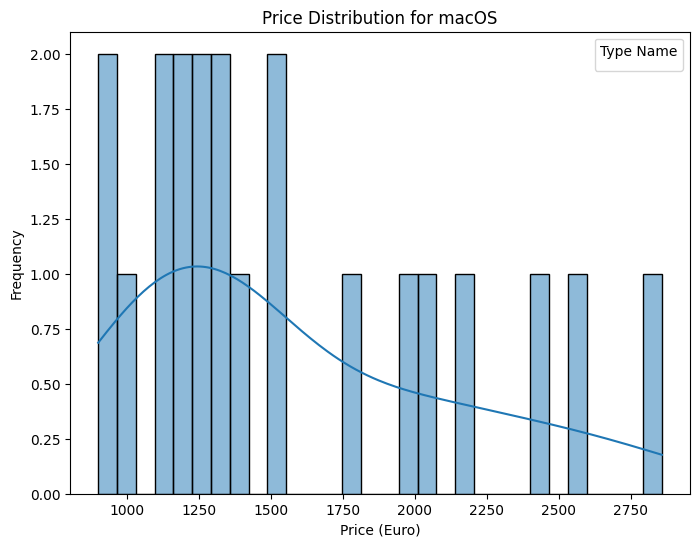

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



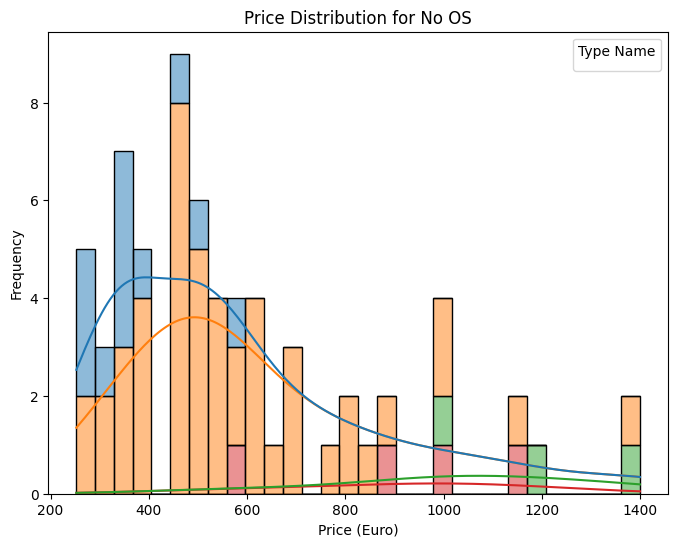

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



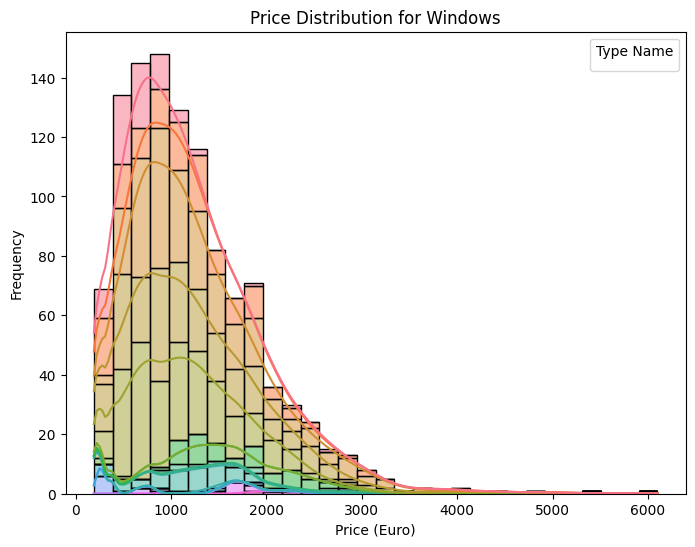

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



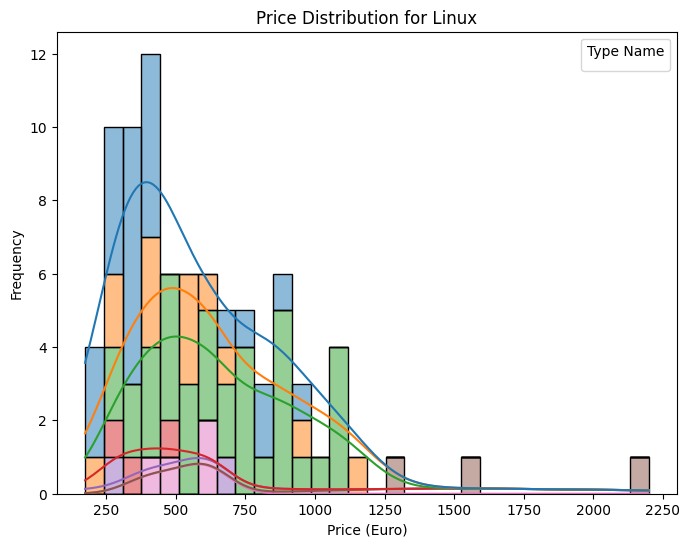

/var/folders/2r/22chk4fn06j2bd_2pbrv5vcm0000gn/T/ipykernel_33652/3929042609.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



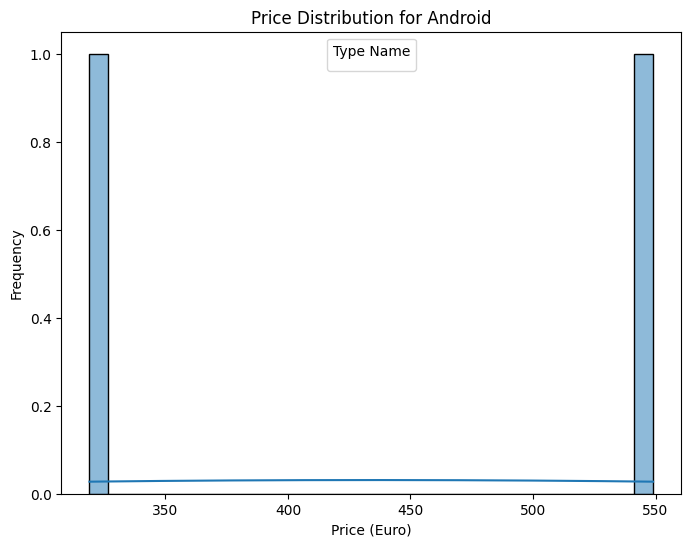

In [69]:
for operatingsys in laptop_data['OpSys'].unique():
    # Filter data for the current operating system
    filtered_data = laptop_data[laptop_data['OpSys'] == operatingsys]

    # Create a plot for the price distribution of the current OS with hue
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.histplot(data=filtered_data, x='Price (Euro)', kde=True, bins=30, hue='Company', multiple='stack')
    plt.title(f'Price Distribution for {operatingsys}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
    plt.legend(title='Type Name')
    plt.show()
